In [2]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By

In [3]:
start_url = "https://boardgamegeek.com/browse/boardgame"
response = requests.get(start_url)
soup_first_page = BeautifulSoup(response.content, "html.parser")
soup_first_page


<!DOCTYPE html>

<html lang="en-US" ng-app="GeekApp" ng-cloak="">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" id="vp" name="viewport"/>
<script>
			window.addEventListener( 'DOMContentLoaded',  function() {
				var width = document.documentElement.clientWidth || window.innerWidth;
				if (width < 960) {
					var mvp = document.getElementById('vp');
					// android debugging
					mvp.setAttribute('content','width=960');
				}
			});
		</script>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Browse Board Games | BoardGameGeek</title>
<link href="https://cf.geekdo-static.com/icons/touch-icon180.png" rel="apple-touch-icon"/>
<link href="https://cf.geekdo-static.com/icons/favicon2.ico" rel="shortcut icon" type="image/ico"/>
<link href="https://cf.geekdo-static.com/icons/favicon2.ico" rel="icon" type="image/ico"/>
<link href="/game-opensearch.xml" rel="search" title="BGG

In [4]:
def get_links_one_page(soup):
    links = []
    for link in soup.find_all("a"):
        if link.get("href") is not None:
            if link.get("href").startswith("/boardgame"):
                links.append("https://boardgamegeek.com" + link.get("href"))
    return links[::2]

In [5]:
dic_first = {
    "id": [],
    "name": [],
    "year": [],
    "rank": [],
    "rating": [],
    "num_voters": [],
    "play_time": [],
    "min_age": [],
    "max_players": [],
    "min_players": [],
    "complexity": [],
    "owned users": [],
    "mechanics": [],
    "categories": [],
}
dic = dic_first.copy()

In [6]:
def get_info_from_first_page(soup, dic):
    ranks = soup.find_all("td", class_="collection_rank")
    ranks = [rank.text for rank in ranks]
    ranks = [rank.replace("\n", "") for rank in ranks]
    ranks = [rank.replace("\t", "") for rank in ranks]
    ranks = [int(rank) for rank in ranks]
    dic["rank"].extend(ranks)
    titels = soup.find_all("a", class_="primary")
    titels = [titel.text for titel in titels]
    dic["name"].extend(titels)
    years = soup.find_all("span", class_="smallerfont")
    years = [year.text for year in years]
    years = [year.replace("(", "").replace(")", "") for year in years]
    years = [int(year) for year in years]
    dic["year"].extend(years)
    ratings = soup.find_all("td", class_="collection_bggrating")
    ratings = soup.find_all("td", class_="collection_bggrating")
    ratings = [rating.text for rating in ratings]
    ratings = [rating.replace("\n", "") for rating in ratings]
    ratings = [rating.replace("\t", "") for rating in ratings]
    ratings = [float(rating) for rating in ratings]
    for i,rate in enumerate(ratings):
        if i%3 == 1:
            dic["rating"].append(rate)
        if i%3 == 2:
            dic["num_voters"].append(rate)

    dic["num_voters"] = [int(voters) for voters in dic["num_voters"]]
   
    



In [7]:
def get_info_sub_page(link, dic):

    id = link.split("/")[-2]
    id  = int(id)
    dic["id"].append(id)
    dic["id"].append(id)
    driver = webdriver.Chrome()

    driver.get(link)

    soup = BeautifulSoup(driver.page_source, 'html')
    driver.close()
    if soup.find("ul", class_="gameplay") is not None:
        ul = soup.find("ul", class_="gameplay")
    else:
        ul = None
    
    if ul.find("span", {"ng-if": "min > 0"}) is not None:
        min_players = ul.find("span", {"ng-if": "min > 0"})
        min_players = int(min_players.text)
    else:
        min_players = None
    dic["min_players"].append(min_players)
    if ul.find("span", {"ng-if":"max>0 && min != max"}) is not None:
        max_players = ul.find("span", {"ng-if":"max>0 && min != max"})
        max_players = int( max_players.text[-1])
    else:
        max_players = None
    dic["max_players"].append(max_players)

    if  ul.find("span", {"itemprop":"suggestedMinAge"}) is not None:
        min_age = ul.find("span", {"itemprop":"suggestedMinAge"})
        min_age = int(min_age.text)
    else:
        min_age = None  

    dic["min_age"].append(min_age)
    if  ul.find("span", {"min":"::geekitemctrl.geekitem.data.item.minplaytime"}).find("span", {"ng-if":"min > 0"}) is not None:
        play_time = ul.find("span", {"min":"::geekitemctrl.geekitem.data.item.minplaytime"}).find("span", {"ng-if":"min > 0"})
        play_time = int(play_time.text)
    else:
        play_time = None
    dic["play_time"].append(play_time)
    if ul.find("span", {"ng-class": "{'gameplay-weight-light': geekitemctrl.geekitem.data.item.stats.avgweight <= 3, 'gameplay-weight-medium': geekitemctrl.geekitem.data.item.stats.avgweight > 3,'gameplay-weight-heavy': geekitemctrl.geekitem.data.item.stats.avgweight > 4 }"})is not None:
        complexity = ul.find("span", {"ng-class": "{'gameplay-weight-light': geekitemctrl.geekitem.data.item.stats.avgweight <= 3, 'gameplay-weight-medium': geekitemctrl.geekitem.data.item.stats.avgweight > 3,'gameplay-weight-heavy': geekitemctrl.geekitem.data.item.stats.avgweight > 4 }"})
        complexity = float(complexity.text.replace("\t", "").replace("\n", "").replace(" ", ""))
    else:
        complexity = None
    dic["complexity"].append(complexity)
    if soup.find("span", {"ng-if": "classification.display_inline"}) is not None:
        types = soup.find("span", {"ng-if": "classification.display_inline"})
        types_list = types.find_all("a")
        types_list = [type.text for type in types_list]
    else:
        types_list = []
    dic["categories"].append(types_list)
    print(types_list)


In [8]:
dic = dic_first.copy()
dic_first
dic

{'id': [],
 'name': [],
 'year': [],
 'rank': [],
 'rating': [],
 'num_voters': [],
 'play_time': [],
 'min_age': [],
 'max_players': [],
 'min_players': [],
 'complexity': [],
 'owned users': [],
 'mechanics': [],
 'categories': []}

In [9]:

buttons = []
driver = webdriver.Chrome()

driver.get(start_url)

soup = BeautifulSoup(driver.page_source, 'html')

cookies_button = soup.find("button", class_="fc-button fc-cta-consent fc-primary-button")
cookies_button = driver.find_element(By.CSS_SELECTOR, "button.fc-button.fc-cta-consent.fc-primary-button")
cookies_button.click()

driver.find_element(By.CSS_SELECTOR, "button#c-p-bn").click()	

div = driver.find_element(By.CSS_SELECTOR, "#collection")
links = div.find_elements(By.CSS_SELECTOR, "a")
for link in links:
    if link.get_attribute("href") is not None:  
        if link.get_attribute("href").startswith("https://boardgamegeek.com/boardgame/"):
            buttons.append(link)

driver.execute_script("arguments[0].scrollIntoView();", buttons[0])
buttons[0].click()

    
driver.close()

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=130.0.6723.117); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7408338A5+3004357]
	(No symbol) [0x00007FF7404C9970]
	(No symbol) [0x00007FF74037582A]
	(No symbol) [0x00007FF740387D4B]
	(No symbol) [0x00007FF74037CF54]
	(No symbol) [0x00007FF74037D0D9]
	(No symbol) [0x00007FF74037AE49]
	(No symbol) [0x00007FF74037E94F]
	(No symbol) [0x00007FF74040CD20]
	(No symbol) [0x00007FF7403EBBDA]
	(No symbol) [0x00007FF74040BA4C]
	(No symbol) [0x00007FF7403EB983]
	(No symbol) [0x00007FF7403B7628]
	(No symbol) [0x00007FF7403B8791]
	GetHandleVerifier [0x00007FF74085A00D+3161901]
	GetHandleVerifier [0x00007FF7408AE060+3506048]
	GetHandleVerifier [0x00007FF7408A400D+3465005]
	GetHandleVerifier [0x00007FF740620EEB+830987]
	(No symbol) [0x00007FF7404D467F]
	(No symbol) [0x00007FF7404D09D4]
	(No symbol) [0x00007FF7404D0B6D]
	(No symbol) [0x00007FF7404C0149]
	BaseThreadInitThunk [0x00007FFAEF81257D+29]
	RtlUserThreadStart [0x00007FFAF0FCAF08+40]


In [ ]:
import pandas as pd
print(dic.keys())
for i,key in enumerate(dic.keys()):
    if len(dic[key]) > 84:
        dic[key] = dic[key][:84]
    print(len(dic[key]))
    

dict_keys(['id', 'name', 'year', 'rank', 'rating', 'num_voters', 'play_time', 'min_age', 'max_players', 'min_players', 'complexity', 'owned users', 'mechanics', 'categories'])
84
84
84
84
84
84
84
84
84
84
84
84
84
84


In [ ]:
df = pd.DataFrame(dic)
df

,id,name,year,rank,rating,num_voters,play_time,min_age,max_players,min_players,complexity,owned users,mechanics,categories
0,224517,Brass: Birmingham,2018,1,8.59,48347,60,14,4.0,2,3.87,None,None,[Strategy]
1,161936,Pandemic Legacy: Season 1,2015,2,8.52,54297,60,13,4.0,2,2.83,None,None,"[Strategy, Thematic]"
2,174430,Gloomhaven,2017,3,8.58,63264,60,14,4.0,1,3.91,None,None,"[Strategy, Thematic]"
3,342942,Ark Nova,2021,4,8.53,46918,90,14,4.0,1,3.77,None,None,[Strategy]
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.59,24681,240,14,6.0,3,4.33,None,None,"[Strategy, Thematic]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,230802,Azul,2017,80,7.74,93778,30,8,4.0,2,1.77,None,None,"[Abstract, Family]"
80,28143,Race for the Galaxy,2007,81,7.74,56230,30,12,4.0,2,2.99,None,None,[Strategy]
81,157354,Five Tribes: The Djinns of Naqala,2014,82,7.77,42171,40,13,4.0,2,2.84,None,None,[Strategy]
82,201808,Clank!: A Deck-Building Adventure,2016,83,7.77,43318,30,12,4.0,2,2.23,None,None,"[Family, Strategy]"


In [ ]:
import matplotlib.pyplot as plt

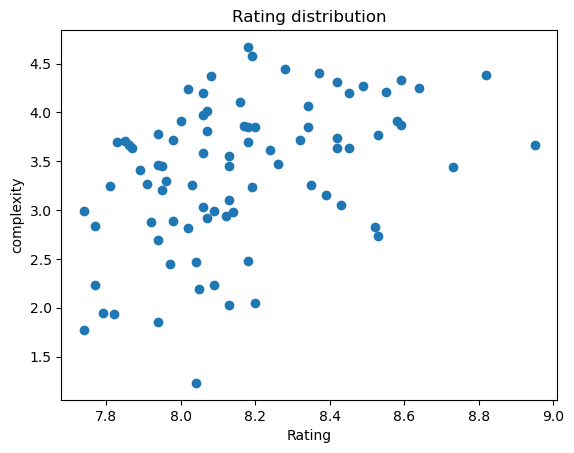

In [ ]:
df.loc[df["min_age"]> 13, ["name", "min_age", "rating"]].sort_values(by="rating", ascending=False)
#plt.plot(df["rating"],df["min_age"], "o")
#plt.hist(df["rating"], bins=20, edgecolor="black")
plt.title("Rating distribution")
plt.xlabel("Rating")
plt.ylabel("complexity")
plt.scatter(df["rating"], df["complexity"])

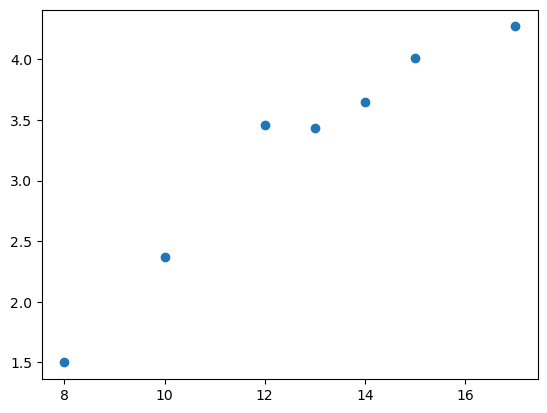

In [ ]:
tmp = df.groupby("min_age")["complexity"].mean()
plt.plot(tmp.index, tmp.values, "o")

In [1]:
corr_mtx = df[["rating", "complexity", "min_age"]].corr()
df.to_csv("boardgame.csv", index=False, header=True)

NameError: name 'df' is not defined

<Axes: >

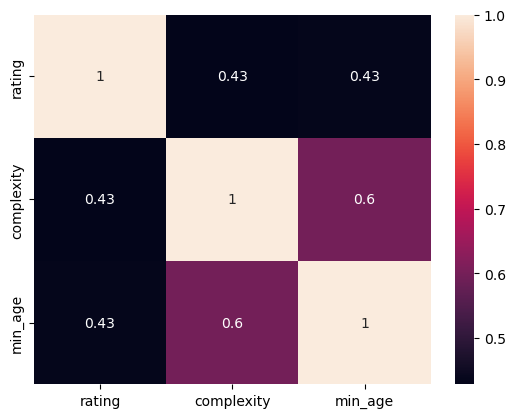

In [128]:
import seaborn as sns
sns.heatmap(corr_mtx, annot=True)